In [1]:
# BINARY CLASSIFICATION LOGISTIC REGRESSION EXERCISE

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [28]:
df = pd.read_csv("HR_comma_sep.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
df.Work_accident.describe()

count    14999.000000
mean         0.144610
std          0.351719
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Work_accident, dtype: float64

In [5]:
df[df['left'] == 1].shape

(3571, 10)

In [6]:
df[df['left'] == 0].shape

(11428, 10)

LOW SALARY =  (7316,)
MEDIUM SALARY =  (6446,)
HIGH SALARY =  (1237,)


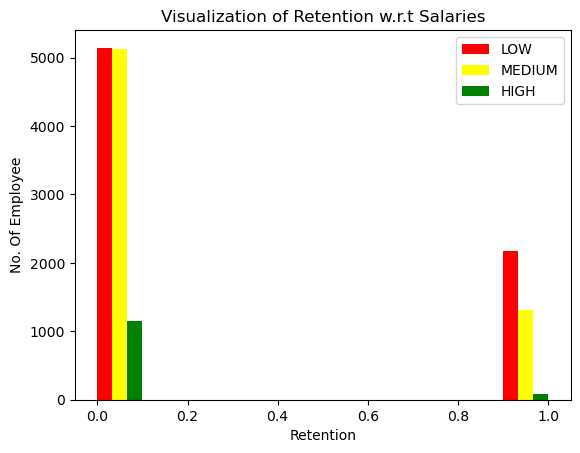

In [7]:
salary_low = df['left'][df['salary'] == 'low']
salary_med = df['left'][df['salary'] == 'medium']
salary_high = df['left'][df['salary'] == 'high']
print("LOW SALARY = ", salary_low.shape)
print("MEDIUM SALARY = ", salary_med.shape)
print("HIGH SALARY = ", salary_high.shape)

plt.hist([salary_low, salary_med, salary_high], 
         color=['red', 'yellow', 'green'], 
         label=['LOW', 'MEDIUM', 'HIGH'], rwidth=1)
plt.xlabel("Retention")
plt.ylabel("No. Of Employee")
plt.title("Visualization of Retention w.r.t Salaries")
plt.legend()

###### FROM THE ABOVE BAR CHART, HIGH SALARY EMPLOYERS NOT THAT MUCH LEAVE THE COMPANY AS COMPARED TO LOW SALARY OR MEDIUM SALARY EMPLOYERS

In [8]:
df.Department.unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

<Axes: xlabel='Department'>

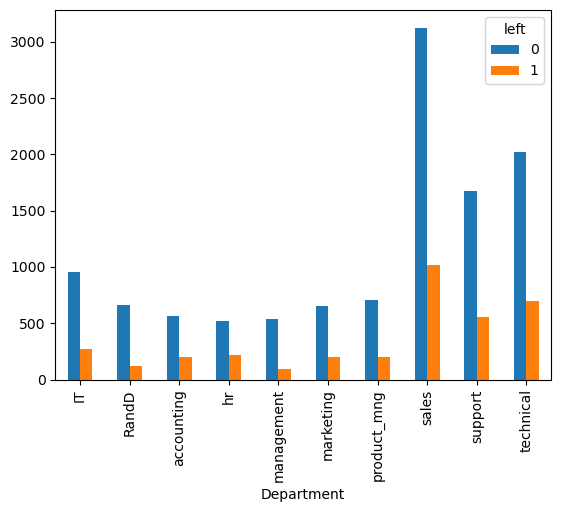

In [9]:
pd.crosstab(df.Department, df.left).plot(kind='bar')

<Axes: xlabel='number_project'>

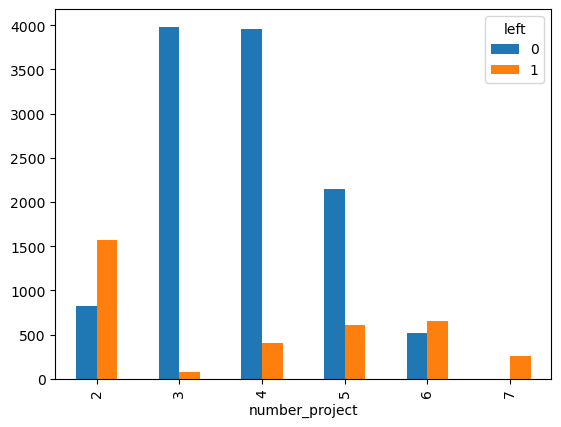

In [10]:
pd.crosstab(df.number_project, df.left).plot(kind='bar')

In [11]:
df1 = df.drop(['Department', 'salary'], axis='columns')

In [12]:
df1.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [13]:
# X = satisfaction_level, average_montly_hours, Work_accident, promotion_last_5years, salary
# y = left

In [14]:
X = df.drop(['last_evaluation', 'number_project', 'time_spend_company', 'Work_accident', 'Department'], axis='columns')
X.head()

,satisfaction_level,average_montly_hours,left,promotion_last_5years,salary
0,0.38,157,1,0,low
1,0.80,262,1,0,medium
2,0.11,272,1,0,medium
3,0.72,223,1,0,low
4,0.37,159,1,0,low


In [15]:
X = pd.get_dummies(X, columns=['salary'], dtype='int')
X.head()

,satisfaction_level,average_montly_hours,left,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,1,0,0,1,0
1,0.80,262,1,0,0,0,1
2,0.11,272,1,0,0,0,1
3,0.72,223,1,0,0,1,0
4,0.37,159,1,0,0,1,0


In [16]:
X.drop(['salary_medium', 'left'], axis='columns', inplace=True)
X.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low
0,0.38,157,0,0,1
1,0.80,262,0,0,0
2,0.11,272,0,0,0
3,0.72,223,0,0,1
4,0.37,159,0,0,1


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, df.left, test_size=0.2)

In [18]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [19]:
model.score(X_test, y_test)

0.7776666666666666

In [20]:
model.predict(X_test)

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [21]:
y_test

10864    0
8682     0
12271    1
7098     0
14867    1
        ..
12445    1
8342     0
9442     0
11408    0
1603     1
Name: left, Length: 3000, dtype: int64

In [35]:
model.predict([[0.38, 100, 0, 0, 0]])

D:\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [41]:
model.predict([[0.11, 272, 0, 0, 1]])

D:\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=int64)